# Метрики качества бинарной классификации
## Programming Assignment

Бинарная классификация (с откликами 0 и 1)

задача предсказания вероятности того, что объект принадлежит классу 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

### несколко слов о предсказаниях

Для вычисления метрик качества в обучении с учителем нужно знать только два вектора: вектор правильных ответов и вектор предсказанных величин; будем обозначать их actual и predicted. 

actual состоит из нулей и единиц, а predicted - из величин из интервала [0, 1] (вероятности класса 1). 

Чтобы сделать финальное предсказание (уже бинарное), нужно установить порог T: все объекты, имеющие предсказание выше порога, относят к классу 1, остальные - к классу 0. 

In [2]:
# рисует один scatter plot
def scatter(actual, predicted, T):
    plt.scatter(actual, predicted)
    plt.xlabel("Labels")
    plt.ylabel("Predicted probabilities")
    plt.plot([-0.2, 1.2], [T, T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    
# рисует несколько scatter plot в таблице, имеющей размеры shape
def many_scatters(actuals, predicteds, Ts, titles, shape):
    plt.figure(figsize=(shape[1]*5, shape[0]*5))
    i = 1
    for actual, predicted, T, title in zip(actuals, predicteds, Ts, titles):
        ax = plt.subplot(shape[0], shape[1], i)
        ax.set_title(title)
        i += 1
        scatter(actual, predicted, T)

Идеальная ситуация: существует порог T, верно разделяющий вероятности, соответствующие двум классам. Пример такой ситуации:

In [3]:
actual_0 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  
          1.,  1.,  1., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_0 = np.array([ 0.19015288,  0.23872404,  0.42707312,  0.15308362,  0.2951875 ,
            0.23475641,  0.17882447,  0.36320878,  0.33505476,  0.202608  ,
            0.82044786,  0.69750253,  0.60272784,  0.9032949 ,  0.86949819,
            0.97368264,  0.97289232,  0.75356512,  0.65189193,  0.95237033,
            0.91529693,  0.8458463 ])

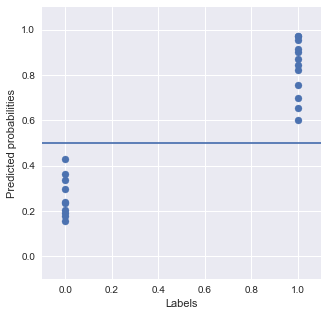

In [4]:
plt.figure(figsize=(5, 5))
scatter(actual_0, predicted_0, 0.5)

Интервалы вероятностей для двух классов прекрасно разделяются порогом T = 0.5.

Чаще всего интервалы накладываются - тогда нужно аккуратно подбирать порог. 


Примеры:

In [5]:
actual_1 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                    0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                    1.,  1.,  1.,  1.])
predicted_1 = np.array([ 0.41310733,  0.43739138,  0.22346525,  0.46746017,  0.58251177,
            0.38989541,  0.43634826,  0.32329726,  0.01114812,  0.41623557,
            0.54875741,  0.48526472,  0.21747683,  0.05069586,  0.16438548,
            0.68721238,  0.72062154,  0.90268312,  0.46486043,  0.99656541,
            0.59919345,  0.53818659,  0.8037637 ,  0.272277  ,  0.87428626,
            0.79721372,  0.62506539,  0.63010277,  0.35276217,  0.56775664])
actual_2 = np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
predicted_2 = np.array([ 0.07058193,  0.57877375,  0.42453249,  0.56562439,  0.13372737,
            0.18696826,  0.09037209,  0.12609756,  0.14047683,  0.06210359,
            0.36812596,  0.22277266,  0.79974381,  0.94843878,  0.4742684 ,
            0.80825366,  0.83569563,  0.45621915,  0.79364286,  0.82181152,
            0.44531285,  0.65245348,  0.69884206,  0.69455127])

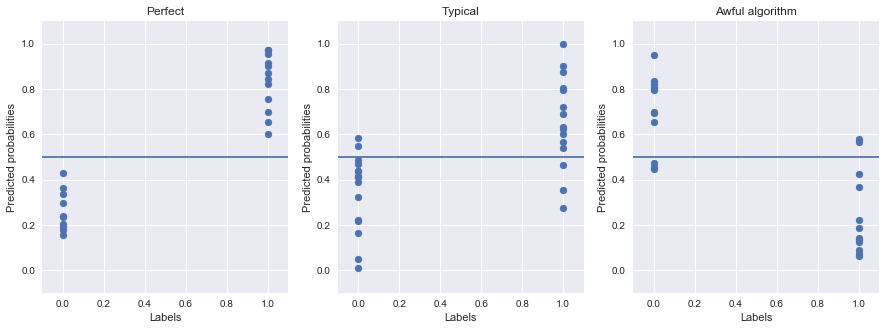

In [6]:
many_scatters([actual_0, actual_1, actual_2], [predicted_0, predicted_1, predicted_2], 
              [0.5, 0.5, 0.5], ["Perfect", "Typical", "Awful algorithm"], (1, 3))

Еще примеры: 

In [7]:
# рискующий идеальный алгоитм
actual_0r = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_0r = np.array([ 0.23563765,  0.16685597,  0.13718058,  0.35905335,  0.18498365,
            0.20730027,  0.14833803,  0.18841647,  0.01205882,  0.0101424 ,
            0.10170538,  0.94552901,  0.72007506,  0.75186747,  0.85893269,
            0.90517219,  0.97667347,  0.86346504,  0.72267683,  0.9130444 ,
            0.8319242 ,  0.9578879 ,  0.89448939,  0.76379055])
# рискующий хороший алгоритм
actual_1r = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_1r = np.array([ 0.13832748,  0.0814398 ,  0.16136633,  0.11766141,  0.31784942,
            0.14886991,  0.22664977,  0.07735617,  0.07071879,  0.92146468,
            0.87579938,  0.97561838,  0.75638872,  0.89900957,  0.93760969,
            0.92708013,  0.82003675,  0.85833438,  0.67371118,  0.82115125,
            0.87560984,  0.77832734,  0.7593189,  0.81615662,  0.11906964,
            0.18857729])

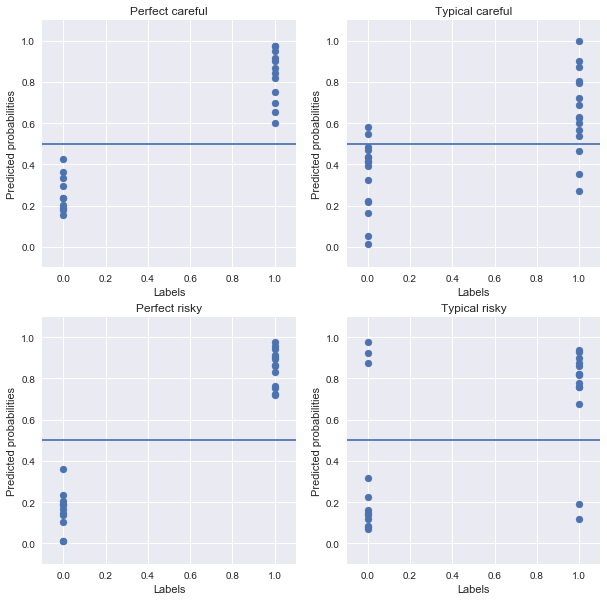

In [8]:
many_scatters([actual_0, actual_1, actual_0r, actual_1r], 
              [predicted_0, predicted_1, predicted_0r, predicted_1r], 
              [0.5, 0.5, 0.5, 0.5],
              ["Perfect careful", "Typical careful", "Perfect risky", "Typical risky"], 
              (2, 2))

Еще примеры: интервалы могут смещаться. 

In [9]:
actual_10 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                1.,  1.,  1.])
predicted_10 = np.array([ 0.29340574, 0.47340035,  0.1580356 ,  0.29996772,  0.24115457,  0.16177793,
                         0.35552878,  0.18867804,  0.38141962,  0.20367392,  0.26418924, 0.16289102, 
                         0.27774892,  0.32013135,  0.13453541, 0.39478755,  0.96625033,  0.47683139,  
                         0.51221325,  0.48938235, 0.57092593,  0.21856972,  0.62773859,  0.90454639,  0.19406537,
                         0.32063043,  0.4545493 ,  0.57574841,  0.55847795 ])
actual_11 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_11 = np.array([ 0.35929566, 0.61562123,  0.71974688,  0.24893298,  0.19056711,  0.89308488,
            0.71155538,  0.00903258,  0.51950535,  0.72153302,  0.45936068,  0.20197229,  0.67092724,
                         0.81111343,  0.65359427,  0.70044585,  0.61983513,  0.84716577,  0.8512387 ,  
                         0.86023125,  0.7659328 ,  0.70362246,  0.70127618,  0.8578749 ,  0.83641841,  
                         0.62959491,  0.90445368])

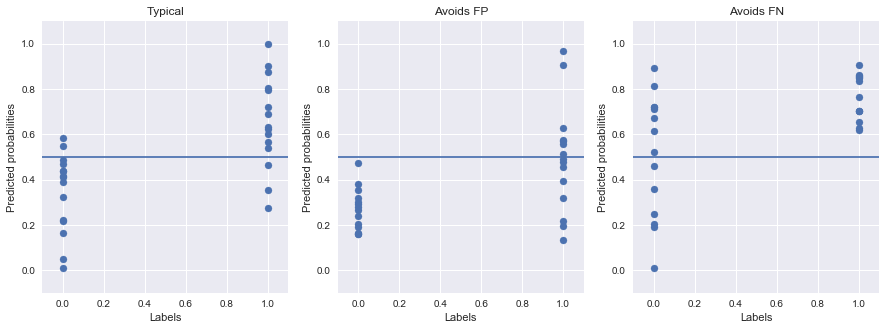

In [10]:
many_scatters([actual_1, actual_10, actual_11], [predicted_1, predicted_10, predicted_11], 
              [0.5, 0.5, 0.5], ["Typical", "Avoids FP", "Avoids FN"], (1, 3))

### Метрики, оценивающие бинарные векторы предсказаний

#### Precision и recall; accuracy

разберемся с метриками, оценивающие качество уже после бинаризации по порогу T, то есть сравнивающие два бинарных вектора: actual и predicted.

Две популярные метрики - precision и recall. Первая показывает, как часто алгоритм предсказывает класс 1 и оказывается правым, а вторая - как много объектов класса 1 алгоритм нашел. 

Также рассмотрим самую простую и известную метрику - accuracy; она показывает долю правильных ответов.

Выясним преимущества и недостатки этих метрик, попробовав их на разных векторах вероятностей.

In [11]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [12]:
T = 0.5
print "Алгоритмы, разные по качеству:"
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0 > T, predicted_1 > T, predicted_2 > T],
                                    ["Perfect:", "Typical:", "Awful:"]):
    print descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted)
print
print "Осторожный и рискующий алгоритмы:"
for actual, predicted, descr in zip([actual_1, actual_1r], 
                                    [predicted_1 > T, predicted_1r > T],
                                    ["Typical careful:", "Typical risky:"]):
    print descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted)
print
print "Разные склонности алгоритмов к ошибкам FP и FN:"
for actual, predicted, descr in zip([actual_10, actual_11], 
                                    [predicted_10 > T, predicted_11 > T], 
                                    ["Avoids FP:", "Avoids FN:"]):
    print descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted)

Алгоритмы, разные по качеству:
Perfect: precision = 1.0 recall = 1.0 ; accuracy = 1.0
Typical: precision = 0.857142857143 recall = 0.8 ; accuracy = 0.833333333333
Awful: precision = 0.181818181818 recall = 0.166666666667 ; accuracy = 0.208333333333

Осторожный и рискующий алгоритмы:
Typical careful: precision = 0.857142857143 recall = 0.8 ; accuracy = 0.833333333333
Typical risky: precision = 0.8 recall = 0.857142857143 ; accuracy = 0.807692307692

Разные склонности алгоритмов к ошибкам FP и FN:
Avoids FP: precision = 1.0 recall = 0.466666666667 ; accuracy = 0.724137931034
Avoids FN: precision = 0.619047619048 recall = 1.0 ; accuracy = 0.703703703704


Все три метрики легко различают простые случаи хороших и плохих алгоритмов. Обратим внимание, что метрики имеют область значений  [0, 1], и потому их легко интерпретировать.

Метрикам не важны величины вероятностей, им важно только то, сколько объектов неправильно зашли за установленную границу (в данном случае T = 0.5).

Метрика accuracy дает одинаковый вес ошибкам false positive и false negative, зато пара метрик precision и recall однозначно идентифицирует это различие. 

посмотрим на последней группе векторов, как меняются precision и recall при увеличении порога.

In [13]:
from sklearn.metrics import precision_recall_curve

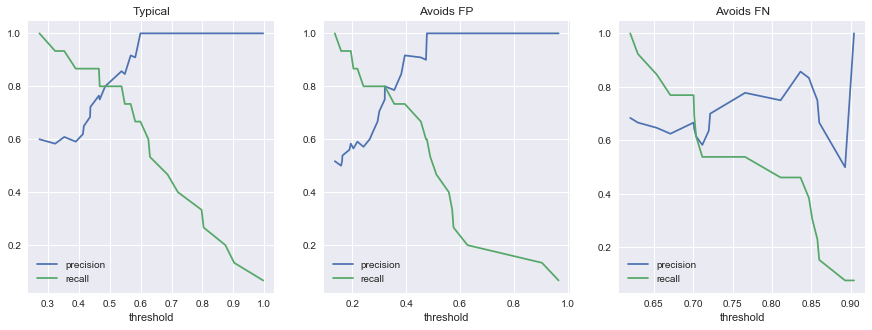

In [14]:
precs = []
recs = []
threshs = []
labels = ["Typical", "Avoids FP", "Avoids FN"]
for actual, predicted in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1, predicted_10, predicted_11]):
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)
plt.figure(figsize=(15, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    plt.plot(threshs[i], precs[i][:-1], label="precision")
    plt.plot(threshs[i], recs[i][:-1], label="recall")
    plt.xlabel("threshold")
    ax.set_title(labels[i])
    plt.legend()

При увеличении порога мы делаем меньше ошибок FP и больше ошибок FN, поэтому одна из кривых растет, а вторая  - падает. 

Примечание: приемлемые значения precision и recall определяются предметной областью. 

__<font color="green" size=5>Programming assignment: problem 1. </font>__ Фиксируем порог T = 0.65; по графикам можно примерно узнать, чему равны метрики на трех выбранных парах векторов (actual, predicted). Вычислим точные precision и recall для этих трех пар векторов.

In [15]:
############### Programming assignment: problem 1 ###############
T = 0.65
answer_problem1 = []
for actual, predicted in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1 > T, predicted_10 > T, predicted_11 > T]):
    answer_problem1.append(precision_score(actual, predicted))
    answer_problem1.append(recall_score(actual, predicted))

In [16]:
# проверим файл предсказаний
[predicted_1 > T]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True,
        False,  True, False, False,  True, False,  True,  True, False,
        False, False, False], dtype=bool)]

In [17]:
# проверим файл ответов
answer_problem1

[1.0,
 0.46666666666666667,
 1.0,
 0.13333333333333333,
 0.6470588235294118,
 0.84615384615384615]

#### F1-score

Очевидный недостаток пары метрик precision-recall - в том, что их две: непонятно, как ранжировать алгоритмы. Чтобы этого избежать, используют F1-метрику, которая равна среднему гармоническому precision и recall. 
F1-метрика будет равна 1, если и только если precision = 1 и recall = 1 (идеальный алгоритм). 

In [20]:
from sklearn.metrics import f1_score

In [21]:
T = 0.5
print "Разные склонности алгоритмов к ошибкам FP и FN:"
for actual, predicted, descr in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1 > T, predicted_10 > T, predicted_11 > T], 
                                    ["Typical:", "Avoids FP:", "Avoids FN:"]):
    print descr, "f1 =", f1_score(actual, predicted)

Разные склонности алгоритмов к ошибкам FP и FN:
Typical: f1 = 0.827586206897
Avoids FP: f1 = 0.636363636364
Avoids FN: f1 = 0.764705882353


F1-метрика в двух последних случаях, когда одна из парных метрик равна 1, значительно меньше, чем в первом, сбалансированном случае.

__<font color="green" size=5>Programming assignment: problem 2. </font>__ На precision и recall влияют и характер вектора вероятностей, и установленный порог. Найдем оптимальные пороги:

In [22]:
############### Programming assignment: problem 2 ###############
k_arr = []
k = 0
T = 0
while T <= 1:
    for actual, predicted in zip([actual_1, actual_10, actual_11],
                                 [predicted_1 > T, predicted_10 > T, predicted_11 > T]):
        k_arr.append(f1_score(actual, predicted))
    k += 1
    T = 0.1 * k

k_arr_reshape = np.array(k_arr).reshape(-1, 3)
ks = np.argmax(k_arr_reshape, axis=0)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# печать для контроля
print len(k_arr_reshape)
print k_arr_reshape
ks

11
[[ 0.66666667  0.68181818  0.65      ]
 [ 0.69767442  0.68181818  0.66666667]
 [ 0.71428571  0.68421053  0.68421053]
 [ 0.71794872  0.77419355  0.72222222]
 [ 0.72222222  0.76923077  0.74285714]
 [ 0.82758621  0.63636364  0.76470588]
 [ 0.75        0.33333333  0.78787879]
 [ 0.57142857  0.23529412  0.71428571]
 [ 0.42105263  0.23529412  0.57142857]
 [ 0.23529412  0.23529412  0.14285714]
 [ 0.          0.          0.        ]]


array([5, 3, 6], dtype=int64)

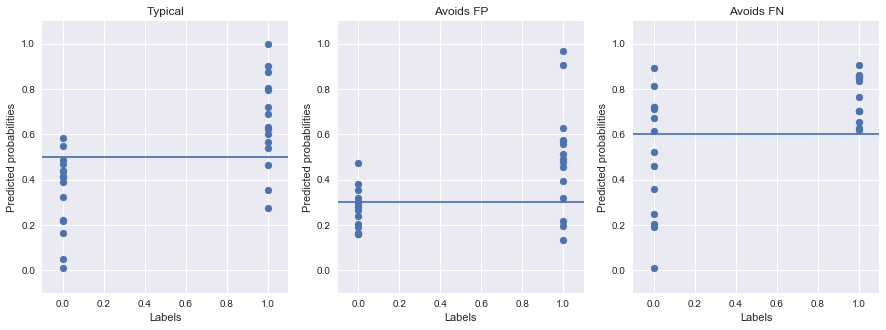

In [24]:
many_scatters([actual_1, actual_10, actual_11], [predicted_1, predicted_10, predicted_11], 
              np.array(ks)*0.1, ["Typical", "Avoids FP", "Avoids FN"], (1, 3))

### Метрики, оценивающие векторы вероятностей класса 1

Рассмотренные метрики удобно интерпретировать, но при их использовании мы не учитываем большую часть информации, полученной от алгоритма. В некоторых задачах вероятности нужны в чистом виде, например, если мы предсказываем, выиграет ли команда в футбольном матче, и величина вероятности влияет на размер ставки за эту команду. Даже если в конце концов мы все равно бинаризуем предсказание, хочется следить за характером вектора вероятности. 

#### Log_loss

Log_loss вычисляет правдоподобие меток в actual с вероятностями из predicted, взятое с противоположным знаком:

$log\_loss(actual, predicted) = - \frac 1 n \sum_{i=1}^n (actual_i \cdot \log (predicted_i) + (1-actual_i) \cdot \log (1-predicted_i))$, $n$ - длина векторов.

Соответственно, эту метрику нужно минимизировать. Это достигается через подбор оптимального прога.

Вычислим все это на наших векторах:

In [27]:
from sklearn.metrics import log_loss

In [28]:
print "Алгоритмы, разные по качеству:"
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect:", "Typical:", "Awful:"]):
    print descr, log_loss(actual, predicted)
print
print "Осторожный и рискующий алгоритмы:"
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r], 
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal risky", "Typical careful:", "Typical risky:"]):
    print descr, log_loss(actual, predicted)
print
print "Разные склонности алгоритмов к ошибкам FP и FN:"
for actual, predicted, descr in zip([actual_10, actual_11], 
                                    [predicted_10, predicted_11], 
                                    ["Avoids FP:", "Avoids FN:"]):
    print descr, log_loss(actual, predicted)

Алгоритмы, разные по качеству:
Perfect: 0.249212637592
Typical: 0.464506822256
Awful: 1.52702488092

Осторожный и рискующий алгоритмы:
Ideal careful 0.249212637592
Ideal risky 0.170619479147
Typical careful: 0.464506822256
Typical risky: 0.613874592234

Разные склонности алгоритмов к ошибкам FP и FN:
Avoids FP: 0.584933970989
Avoids FN: 0.588679128881


Видим, что log_loss хорошо различает идеальный, типичный и плохой случаи. 

эта метрика различает осторожный и рискующий алгоритмы. 

Таким образом, log_loss чувствителен и к вероятностям, близким к 0 и 1, и к вероятностям, близким к 0.5. 

Ошибки FP и FN обычный Log_loss различать не умеет.

__Обобщение log_loss на случай, когда нужно больше штрафовать FP или FN:__ для этого достаточно добавить выпуклую (то есть неотрицательную и суммирующуюся к единице) комбинацию из двух коэффициентов к слагаемым правдоподобия. Например, давайте штрафовать false positive:

$weighted\_log\_loss(actual, predicted) = -\frac 1 n \sum_{i=1}^n (0.3\, \cdot actual_i \cdot \log (predicted_i) + 0.7\,\cdot (1-actual_i)\cdot \log (1-predicted_i))$

Если алгоритм неверно предсказывает большую вероятность первому классу, то есть объект на самом деле принадлежит классу 0, то первое слагаемое в скобках равно нулю, а второе учитывается с большим весом.  

__<font color="green" size=5>Programming assignment: problem 3. </font>__ Пишем функцию, которая берет на вход векторы actual и predicted и возвращает модифицированный Log-Loss, вычисленный по формуле выше. Вычисляем ее значение (обозначим его wll)

In [29]:
############### Programming assignment: problem 3 ############### часть 1
def weighted_log_loss(actual, predicted):
    return -1./len(actual) * np.sum(0.3 * actual * np.log(predicted) + 0.7 * (1 - actual) * np.log(1 - predicted))

In [30]:
############### Programming assignment: problem 3 ############### часть 2


print 'вычисляем weighted_log_loss для разных алгоритмов \n'
wll_arr = []
print "Алгоритмы, разные по качеству:"
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect:", "Typical:", "Awful:"]):
    wll = weighted_log_loss(actual, predicted)
    wll_arr.append(wll)
    print descr, wll
print
print "Осторожный и рискующий алгоритмы:"
for actual, predicted, descr in zip([actual_0r, actual_1r], 
                                    [predicted_0r, predicted_1r],
                                    ["Ideal risky", "Typical risky:"]):
    wll = weighted_log_loss(actual, predicted)
    wll_arr.append(wll)
    print descr, wll
print
print "Разные склонности алгоритмов к ошибкам FP и FN:"
for actual, predicted, descr in zip([actual_10, actual_11], 
                                    [predicted_10, predicted_11], 
                                    ["Avoids FP:", "Avoids FN:"]):
    wll = weighted_log_loss(actual, predicted)
    wll_arr.append(wll)
    print descr, wll


вычисляем weighted_log_loss для разных алгоритмов 

Алгоритмы, разные по качеству:
Perfect: 0.131254618139
Typical: 0.230135092125
Awful: 0.735079049383

Осторожный и рискующий алгоритмы:
Ideal risky 0.0841757752539
Typical risky: 0.335447800127

Разные склонности алгоритмов к ошибкам FP и FN:
Avoids FP: 0.237852614026
Avoids FN: 0.358665939615


In [31]:
wll_arr

[0.13125461813899453,
 0.23013509212543612,
 0.73507904938312107,
 0.084175775253905197,
 0.33544780012734865,
 0.23785261402637708,
 0.35866593961517557]

Обратим внимание на разницу weighted_log_loss между случаями Avoids FP и Avoids FN.

#### ROC и AUC

При построении ROC-кривой (receiver operating characteristic) происходит варьирование порога бинаризации вектора вероятностей, и  вычисляются величины, зависящие от числа ошибок FP и FN. Эти величины задаются так, чтобы в случае, когда существует порог для идеального разделения классов, ROC-кривая проходила через определенную точку - верхний левый угол квадрата [0, 1] x [0, 1]. Кроме того, она всегда проходит через левый нижний и правый верхний углы. Получается наглядная визуализация качества алгоритма. С целью охарактеризовать эту визуализацию численно, ввели понятие AUC - площадь под ROC-кривой.


Построим ROC-кривые для нашего примера:

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

Perfect:1.000000 Typical:0.884444 Awful:0.041667 Ideal careful:1.000000 Ideal Risky:1.000000 Typical careful:0.884444 Typical risky:0.738095 Typical:0.884444 Avoids FP:0.819048 Avoids FN:0.780220 


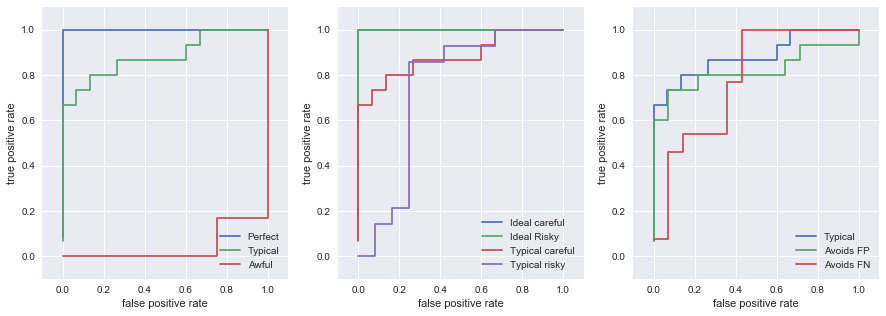

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
aucs = ""
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect", "Typical", "Awful"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label=descr)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplot(1, 3, 2)
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r], 
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal Risky", "Typical careful", "Typical risky"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplot(1, 3, 3)
for actual, predicted, descr in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1, predicted_10, predicted_11], 
                                    ["Typical", "Avoids FP", "Avoids FN"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
print aucs

Чем больше объектов в выборке, тем более гладкой выглядит кривая (хотя на самом деле она все равно ступенчатая).

Как и ожидалось, кривые всех идеальных алгоритмов проходят через левый верхний угол. На первом графике также показана типичная ROC-кривая (обычно на практике они не доходят до "идеального" угла). 

Теперь удобно выбирать порог бинаризации, в котором будет достигнут компромисс между FP или FN

__<font color="green" size=5>Programming assignment: problem 4. </font>__ На каждой кривой найдем точку, которая ближе всего к левому верхнему углу (ближе в смысле обычного евклидова расстояния), этой точке соответствует некоторый порог бинаризации. Он будет оптимальным. 

Пояснение: функция roc_curve возвращает три значения: FPR (массив абсции точек ROC-кривой), TPR (массив ординат точек ROC-кривой) и thresholds (массив порогов, соответствующих точкам).

Отрисуем найденную точку на графике с помощью функции plt.scatter.

In [35]:
############### Programming assignment: problem 4 ############### (мой вариант)

In [36]:
from numpy.linalg import norm

In [37]:
def T_max_for_minnorm(actual, predicted):
    fpr, tpr, thr = roc_curve(actual, predicted)
    print thr
    thr_norm = norm(np.array(zip(fpr, tpr)) - [0, 1], axis=1)
    min_norm = min(thr_norm)
    T = []
    for i in range(len(thr_norm)):
        if thr_norm[i] == min_norm:
            T.append([thr[i], i])
    print T
    T_dict = dict(T)
    #print T_dict.keys()
    T_max = max(T_dict.keys())
    ind = T_dict[T_max]
    print ind
    plt.plot(fpr, tpr)
    plt.scatter(fpr[ind], tpr[ind])
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc=4)
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    plt.show()
    return T_max

[ 0.97368264  0.60272784  0.15308362]
[[0.60272784000000001, 1]]
1


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


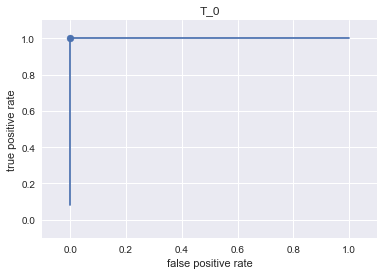

[ 0.99656541  0.59919345  0.58251177  0.56775664  0.54875741  0.53818659
  0.46746017  0.46486043  0.38989541  0.35276217  0.32329726  0.272277
  0.01114812]
[[0.53818659000000002, 5]]
5


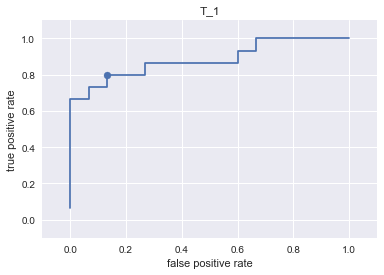

[ 1.94843878  0.94843878  0.65245348  0.56562439  0.44531285  0.06210359]
[[1.94843878, 0], [0.06210359, 5]]
0


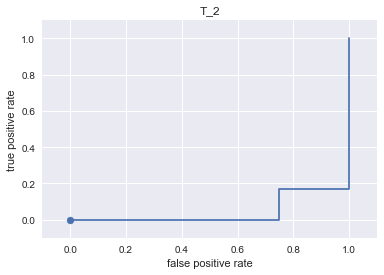

[ 0.97667347  0.72007506  0.0101424 ]
[[0.72007505999999999, 1]]
1


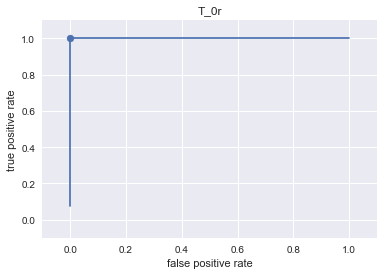

[ 1.97561838  0.97561838  0.92708013  0.92146468  0.89900957  0.87579938
  0.67371118  0.22664977  0.18857729  0.13832748  0.11906964  0.07071879]
[[0.67371117999999997, 6]]
6


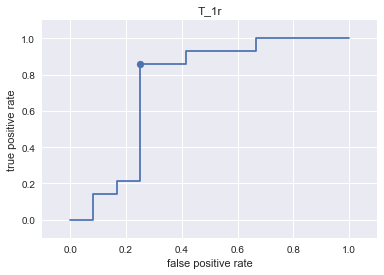

[ 0.96625033  0.47683139  0.47340035  0.39478755  0.35552878  0.32063043
  0.24115457  0.21856972  0.20367392  0.19406537  0.1580356   0.13453541]
[[0.39478754999999999, 3]]
3


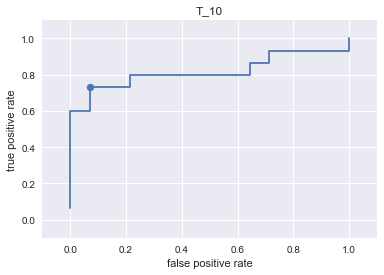

[ 0.90445368  0.89308488  0.83641841  0.81111343  0.7659328   0.71155538
  0.70044585  0.67092724  0.61983513  0.00903258]
[[0.70044585000000004, 6]]
6


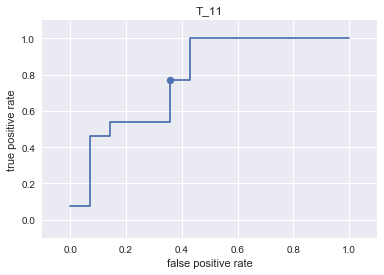

 T_0 = 0.60272784 
 T_1 = 0.53818659 
 T_2 = 1.94843878 
 T_0r = 0.72007506 
 T_1r = 0.67371118 
 T_10 = 0.39478755 
 T_11 = 0.70044585


In [38]:
T = []
for actual, predicted, descr in zip([actual_0, actual_1, actual_2, actual_0r, actual_1r, actual_10, actual_11], 
                            [predicted_0, predicted_1, predicted_2, predicted_0r, predicted_1r, predicted_10, predicted_11],
                                   ['T_0', 'T_1', 'T_2', 'T_0r', 'T_1r', 'T_10', 'T_11']):
    plt.title(descr)
    T += [T_max_for_minnorm(actual, predicted)]
            

T_0, T_1, T_2, T_0r, T_1r, T_10, T_11 = T
print (' T_0 = {} \n T_1 = {} \n T_2 = {} \n T_0r = {} \n T_1r = {} \n T_10 = {} \n T_11 = {}').format(T_0, T_1, T_2, T_0r, T_1r, T_10, T_11)

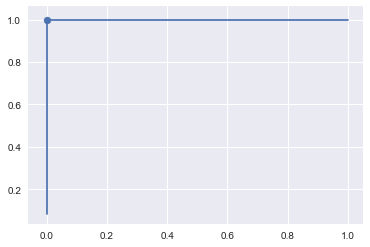

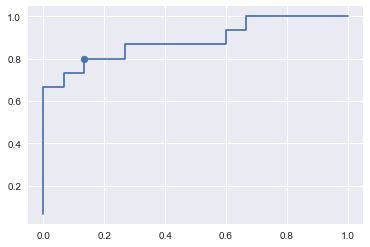

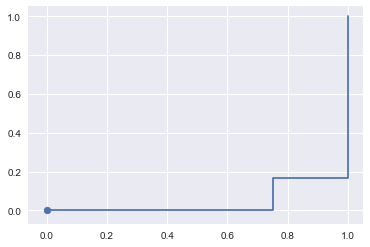

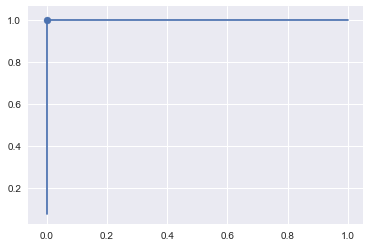

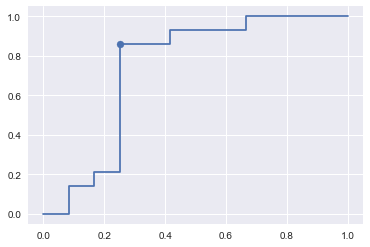

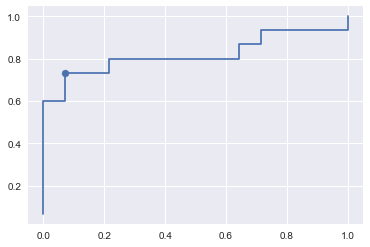

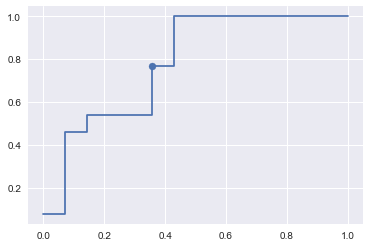

In [39]:
############### Programming assignment: problem 4 ############### (альтернативный вариант. Ответ тот же)
rocs_list = [roc_curve(actual, predicted) for actual, predicted in
             zip([actual_0, actual_1, actual_2, actual_0r, actual_1r, actual_10, actual_11],
                 [predicted_0, predicted_1, predicted_2, predicted_0r, predicted_1r, predicted_10, predicted_11])]
                 
T_0, T_1, T_2, T_0r, T_1r, T_10, T_11 = [roc[2][min(range(len(roc[0])),
                                                        key=lambda x: roc[0][x]**2+(1-roc[1][x])**2)] for roc in rocs_list]
mins = [min(range(len(roc[0])), key=lambda x: roc[0][x]**2+(1-roc[1][x])**2) for roc in rocs_list]
for i, roc in enumerate(rocs_list):
    plt.plot(roc[0], roc[1])
    plt.scatter([roc[0][mins[i]]], [roc[1][mins[i]]])
    plt.show()

In [40]:
[min(range(len(roc[0])), key=lambda x: roc[0][x]**2+(1-roc[1][x])**2) for roc in rocs_list]

[1, 5, 0, 1, 6, 3, 6]

In [41]:
rocs_list

[(array([ 0.,  0.,  1.]),
  array([ 0.08333333,  1.        ,  1.        ]),
  array([ 0.97368264,  0.60272784,  0.15308362])),
 (array([ 0.        ,  0.        ,  0.06666667,  0.06666667,  0.13333333,
          0.13333333,  0.26666667,  0.26666667,  0.6       ,  0.6       ,
          0.66666667,  0.66666667,  1.        ]),
  array([ 0.06666667,  0.66666667,  0.66666667,  0.73333333,  0.73333333,
          0.8       ,  0.8       ,  0.86666667,  0.86666667,  0.93333333,
          0.93333333,  1.        ,  1.        ]),
  array([ 0.99656541,  0.59919345,  0.58251177,  0.56775664,  0.54875741,
          0.53818659,  0.46746017,  0.46486043,  0.38989541,  0.35276217,
          0.32329726,  0.272277  ,  0.01114812])),
 (array([ 0.        ,  0.08333333,  0.75      ,  0.75      ,  1.        ,  1.        ]),
  array([ 0.        ,  0.        ,  0.        ,  0.16666667,  0.16666667,  1.        ]),
  array([ 1.94843878,  0.94843878,  0.65245348,  0.56562439,  0.44531285,
          0.06210359])),
 

In [42]:
rocs_list[2][2][0]

1.94843878

In [43]:
print T_0, T_1, T_2, T_0r, T_1r, T_10, T_11

0.60272784 0.53818659 1.94843878 0.72007506 0.67371118 0.39478755 0.70044585


In [44]:
max(range(14), key=lambda x: 1)

0

Наподобие roc_curve, строят также precision-recall curve и ищут площадь под ней.

### примечание

рассмотрено несколько метрик бинарной классификации. Некоторые из них, например, log_loss, обобщаются на многоклассовый случай. Если метрику сложно обобщить в виде формулы, задачу многоклассовой классификации рассматривают как совокупность задач бинарной классификации и затем особыми способами усредняют метрику (например, micro и macro averaging).

не забывать визуализировать